## 1. Introduction

bla

### Table of contents

- 1. Introduction

- 2. Exploratory data analysis
- 2. 1 Importing Libraries and load the data
- 3. Preprocessing
- 3. 1 Cleaning the data 
- 3. 2 Handling missing values
- 3. 3 Converting text labels to numbers (feature encoding)
- 4. Modelling
- 4. 1 symple base-line model
- 4. 2 two sophisticated model approaches
- 4. 3 Experiment and testing the model
- 5. Results
- 6. Discussion


## 2. Exploratory data analysis

Analyse your data. Visualise and explain the data features you deem to be relevant for
the project.

### 2.1 Importing Libraries and load data

In [41]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split

heart_data = pd.read_csv("Heart_Disease_Prediction.csv")

heart_data.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## 3. Preprocessing

Explain what kind of preprocessing, feature encoding you are applying

## 3.1 Cleaning the data

In [42]:
#drop the 'index' column
heart_data = heart_data.drop(columns=['index'])


In [43]:
print("no missing value")
print("-----------------------------")
print(heart_data.isna().sum())
print("-----------------------------")
print("no value which is zero: ",sum(pd.isnull(heart_data).any(axis=1)))

no missing value
-----------------------------
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64
-----------------------------
no value which is zero:  0


In [44]:
print(f"Number of duplicated data: {int(heart_data.duplicated().sum())}")

Number of duplicated data: 0


## 3.2 Converting text labels to numbers (feature encoding)

In [45]:
y = heart_data.pop("Heart Disease")

In [46]:
# Target encoding for absence and presence of heart disease
encoder = preprocessing.LabelEncoder()
label_encoder = encoder.fit_transform(y)
print(label_encoder)


[1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1
 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1
 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1
 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1
 0 0 1 1 0 1 0 0 0 0 1]


## 3.3 Split Train, Validation and Test dataset

In [47]:
# we change the percentage of train datasets
train_X, test_X, train_y, test_y = train_test_split(heart_data, y, test_size = 0.25, random_state = 1)

test_X, validation_X, test_y, validation_y = train_test_split(test_X, test_y, test_size = 0.5, random_state = 1)

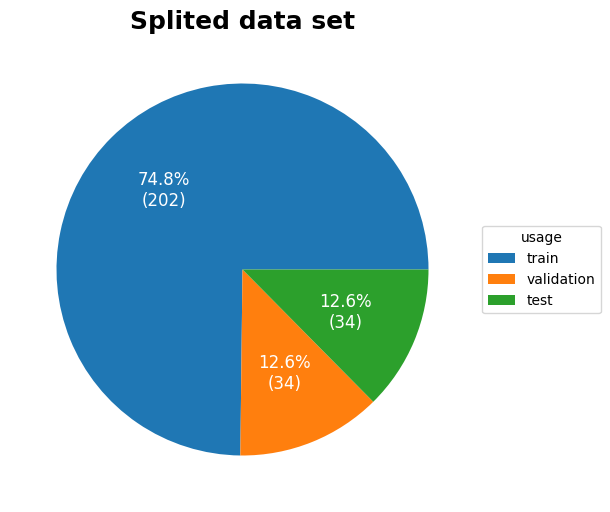

In [48]:
# count length
train_length = len(train_X)
validation_length = len(validation_X)
test_length = len(test_X)

# prepare for matplotlip
length = [train_length,validation_length,test_length]
label = ["train","validation","test"]

# plotting
fig, ax = plt.subplots(figsize=(6, 8), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"


wedges, texts, autotexts = ax.pie(length, autopct=lambda pct: func(pct, length),
                                  textprops=dict(color="w"))

ax.legend(wedges, label,
          title= "usage",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12)

ax.set_title("Splited data set", size = 18, weight = "bold")

plt.show()

## 4. Modelling

### 4. 1 symple base-line model

perfect model setup for baseline: Logicstic regression

is interpretable, medically standard and easy to explain coefficients

In [49]:
# line model 

### 4. 2 two sophisticated model approaches

number 1 random forest: captures feature interactions, non linear splits, robust on small datasets

numeber 2 Gradient Boosting or SVM (RBF)
